In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris= load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['flower_names'] = df.target.apply(lambda x : iris.target_names[x])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
x = df.drop(['target',"flower_names"],axis ="columns")
y = df.target

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

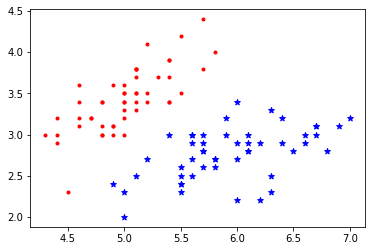

In [17]:
%matplotlib inline
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = "red",marker =".")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = "blue",marker ="*")

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
model.score(x_test,y_test)

0.9666666666666667

In [32]:
y_predicted = model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 9,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

In [35]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

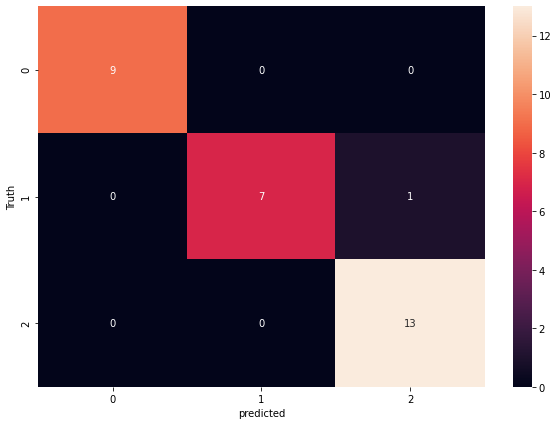

In [37]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")